In [150]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
sns.set_theme()

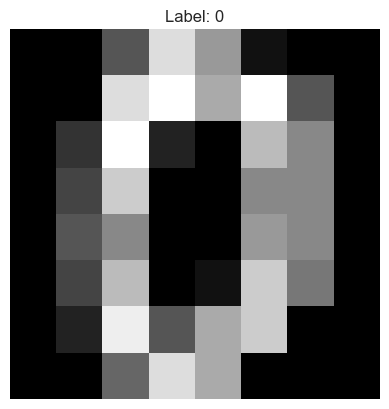

In [149]:
digits = datasets.load_digits(as_frame=True)
df = digits.frame

X = df.drop(["target"], axis=1)
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Show the first image and its label
plt.imshow(digits.images[0], cmap='gray')
plt.title(f"Label: {digits.target[0]}")
plt.axis('off')
plt.show()

Above: Example 8x8 grayscale digit from the data set

In [144]:
# Compare a single decision tree with up to 15 depth to a random forest with up to just 5 depth

tree_clf = DecisionTreeClassifier(max_depth=15, random_state=42)
tree_clf.fit(X_train, y_train)
# Note the actual depth of the deep tree
print(tree_clf.get_depth())
tree_y_pred = tree_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, tree_y_pred), "\n")

forest_clf = RandomForestClassifier(max_depth = 5, n_estimators = 30,
                                    bootstrap = True,
                                    n_jobs = -1)
forest_clf.fit(X_train, y_train)
forest_y_pred = forest_clf.predict(X_test)
print(f"Forest Classification Report")
print(classification_report(y_test, forest_y_pred), "\n")

14
Tree Classification Report
              precision    recall  f1-score   support

           0       0.92      0.91      0.91        53
           1       0.74      0.78      0.76        50
           2       0.83      0.74      0.79        47
           3       0.78      0.85      0.81        54
           4       0.81      0.85      0.83        60
           5       0.92      0.86      0.89        66
           6       0.93      0.94      0.93        53
           7       0.85      0.84      0.84        55
           8       0.89      0.77      0.82        43
           9       0.78      0.85      0.81        59

    accuracy                           0.84       540
   macro avg       0.85      0.84      0.84       540
weighted avg       0.85      0.84      0.84       540
 

Forest Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.94      0.88      0.91        50
           2     

Now, analyze the effect of altering the max depth of the classifiers in the random forest.

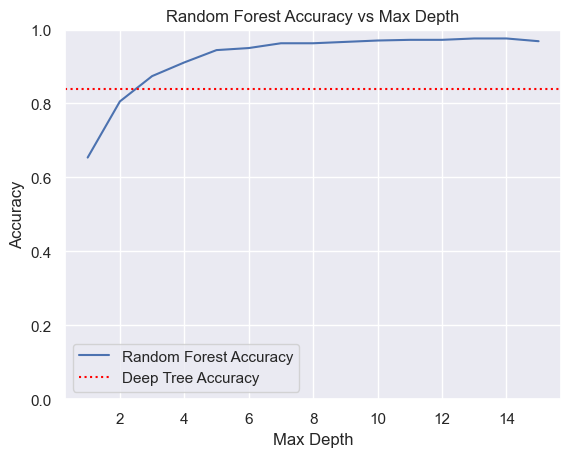

In [146]:
accuracies = []

for i in range(1, 16):
    forest_clf = RandomForestClassifier(max_depth=i, n_estimators=50,
                                        bootstrap=True, n_jobs=-1)
    forest_clf.fit(X_train, y_train)
    forest_y_pred = forest_clf.predict(X_test)
    accuracies.append(np.mean(forest_y_pred == y_test))

x = list(range(1, 16))
plt.plot(x, accuracies, label='Random Forest Accuracy')
plt.axhline(0.84, color='red', linestyle='dotted', label='Deep Tree Accuracy')

plt.title("Random Forest Accuracy vs Max Depth")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()

In [148]:
# The random forest correctly classifies the digits 97.5% of the time, and outperforms the singular deep tree with depth > 2.
print(max(accuracies))

0.975925925925926


Now, investigate how the number of classifiers affects the quality of the solution.


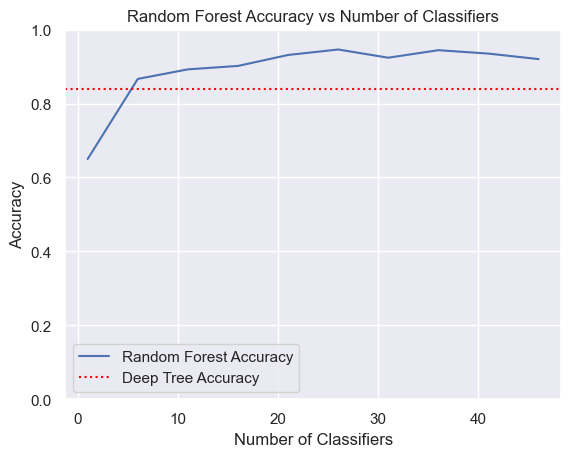

In [145]:

accuracies = []

for i in range(1,51, 5):
    forest_clf = RandomForestClassifier(max_depth=5, n_estimators=i,
                                        bootstrap=True, n_jobs=-1)
    forest_clf.fit(X_train, y_train)
    forest_y_pred = forest_clf.predict(X_test)
    accuracies.append(np.mean(forest_y_pred == y_test))

x = list(range(1, 51, 5))
plt.plot(x, accuracies, label='Random Forest Accuracy')
plt.axhline(0.84, color='red', linestyle='dotted', label='Deep Tree Accuracy')

plt.title("Random Forest Accuracy vs Number of Classifiers")
plt.xlabel("Number of Classifiers")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()

This suggests that for this data set, it is not valuable to have more than about 25 classifiers in order to get all the benefit from the random forest.

In [141]:
accuracies = []

for _ in range(100):
    tree_clf = DecisionTreeClassifier(max_depth=5)
    tree_clf.fit(X_train, y_train)
    tree_clf_pred = tree_clf.predict(X_test)
    accuracies.append(np.mean(tree_clf_pred == y_test))
print("Mean accuracy of depth 5 trees: " + str(np.mean(accuracies)))
print( "Standard Deviation of depth 5 trees: " + str(np.std(accuracies)))

Mean accuracy of depth 5 trees: 0.6618703703703704
Standard Deviation of depth 5 trees: 0.003543720658326839


Note that a singular 5-max depth decision tree will always get in the neighborhood of 0.66 accuracy on this dataset, but when we take the popular vote among just about 20 to 30 of them, the accuracy increases all the way to 0.94. Compared to the single deep tree, which used 14 of its allowed 15 depth, this is a significant improvement, as that tree only had 0.84 classification accuracy. If we use deep trees for the classifiers of the random forest, we can achieve a classification accuracy of about 0.975. In this case, there are only 64 features and 1,797 instances, so using deep trees is feasible here. But for datasets with many more features and instances, it may be far too computationally expensive to use deep tress in the random forest. Either way, significant improvements can be made with trees only 3 deep for this dataset. So, it is likely that there will be a good balance between computational feasibility and improving accuracy.